In [1]:
# import dependencies
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler

In [2]:
# read in csv as pandas dataframe
df = pd.read_csv(Path('resources/clean-col_outliers-OUT.csv'))
df.head()

,Year,Full Name,Age,Salary,ERA,Hits,ER,SO,HR,Wins,Losses,OP,BFP,GF,Weight,Height,League,Team,GS
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24


In [3]:
# Split our preprocessed data into our features and target arrays
y = df['Salary'].values
X = df.drop(['Salary','Year','Full Name','Height','Weight','League','Team'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# Create the model and fit the model to the data
model = LinearRegression()
model

LinearRegression()

In [5]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score*100:.2f}%")
print(f"Testing Score: {testing_score*100:.2f}%")

Training Score: 30.34%
Testing Score: 31.40%


In [6]:
# Score the prediction with MSE and R2
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

mean squared error (MSE): 3572092471054.88
R-squared (R2 ): 0.31


In [7]:
# Print the coefficient and the intercept for the model.

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [267798.84453735 -47609.24190816  20663.72016327   4281.60568066
  18703.44569443 -12137.00806205  24330.02193786  -3393.07978683
   7328.70834262 -15457.20284052 -23486.31543517  82780.00900613]
y-axis intercept:  -5993375.1907234285


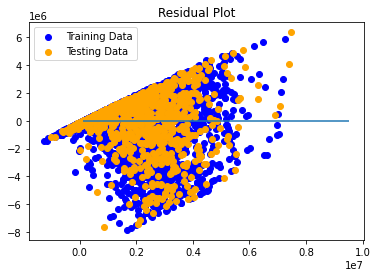

In [8]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(0), xmax=y.max(0))
plt.title("Residual Plot")
plt.show()

### Scaled with StandardScaler
---

In [9]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Create the model and fit the model to the data
model = LinearRegression()
model

LinearRegression()

In [11]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Score: {training_score*100:.2f}%")
print(f"Testing Score: {testing_score*100:.2f}%")

Training Score: 30.34%
Testing Score: 31.40%


In [12]:
# Score the prediction with MSE and R2
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

mean squared error (MSE): 3572092471054.88
R-squared (R2 ): 0.31


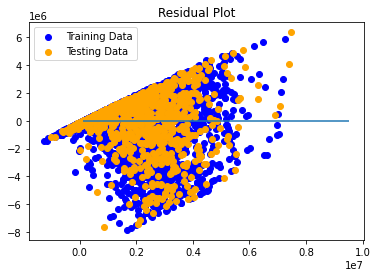

In [13]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

### Using MinMaxScaler
---

In [14]:
# Create a scaler instance
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_minMax = X_scaler.transform(X_train)
X_test_minMax = X_scaler.transform(X_test)

In [15]:
# Create the model and fit the model to the data
model = LinearRegression()
model

LinearRegression()

In [16]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

model.fit(X_train_minMax, y_train)
training_score = model.score(X_train_minMax, y_train)
testing_score = model.score(X_test_minMax, y_test)

print(f"Training Score: {training_score*100:.2f}%")
print(f"Testing Score: {testing_score*100:.2f}%")

Training Score: 30.34%
Testing Score: 31.40%


In [17]:
# Score the prediction with MSE and R2
y_pred = model.predict(X_test_minMax)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

mean squared error (MSE): 3572092471054.88
R-squared (R2 ): 0.31


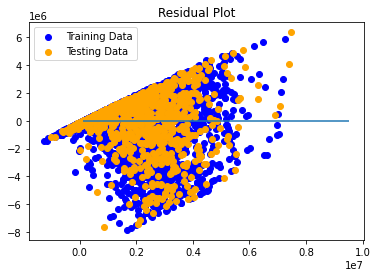

In [18]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train_minMax), model.predict(X_train_minMax) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minMax), model.predict(X_test_minMax) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()